In [ ]:
from joblib import Parallel, delayed
import os
os.environ['R_HOME'] = '/datapool/home/zhijian/zhijian/miniconda3/envs/circadian/lib/R'
# os.environ['R_HOME'] = '/public/home/liuzj/softwares/anaconda3/envs/hormone/lib/R'
import rpy2
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
import rpy2.ipython.html
rpy2.ipython.html.init_printing()
from jpy_tools.rTools import py2r, r2py, r_inline_plot, rHelp, trl, rSet, rGet, ad2so, so2ad, so2md, rcontext, Trl, r2py_re, py2r_re, RR, FR
from jpy_tools import loadPkl, toPkl
rBase = importr('base')
rUtils = importr('utils')
dplyr = importr('dplyr')
reticulate = importr('reticulate')
R = ro.r
T = Trl()
R("options(browser='firefox', shiny.port=6533, max.print=200)")
%load_ext rpy2.ipython


    an issue that caused a segfault when used with rpy2:
    https://github.com/rstudio/reticulate/pull/1188
    Make sure that you use a version of that package that includes
    the fix.
    

<Figure size 100x100 with 0 Axes>

In [ ]:
%config InlineBackend.figure_format = 'retina'
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.font_manager as font_manager
import marsilea as ma
import marsilea.plotter as mp
# plt.rcParams['figure.dpi'] = 150
font_dirs = ["/datapool/home/zhijian/.local/share/mpl_fontkit/"]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
plt.rcParams["font.family"] = "Arial"
sns.despine(top=True, right=True)
from itertools import product
from functools import reduce
import patchworklib as pw
from jpy_tools.otherTools import pwRecoverSeaborn, pwStack, F, pwShow
pw.show = pwShow
fc_recoverSns = pwRecoverSeaborn()
import seaborn.objects as so
from cycler import cycler
dt_snsStyle = {**sns.axes_style('ticks'), "legend.frameon": False, "axes.spines.top":False, "axes.spines.right":False, "axes.prop_cycle":cycler(color=['grey'])}
so.Plot.config.theme.update(dt_snsStyle)
from jpy_tools.soExt import Axhline, Axvline, mvLegToAx
from jpy_tools import soExt
plt.set_loglevel('Warning')

<Figure size 640x480 with 0 Axes>

In [ ]:
import scanpy as sc
import muon as mu
import pandas as pd
import numpy as np
import scipy.sparse as ss
from tqdm import tqdm
from loguru import logger
from functools import partial
from jpy_tools import singleCellTools

In [ ]:
from jpy_tools.otherTools import FigConcate, FigConcateWrap

In [ ]:
dir_result = "/datapool/home/zhijian/zhijian/ipf/circadian_data/"

In [ ]:
ead = singleCellTools.EnhancedAnndata(
    loadPkl(
        "beforeQc",
        lambda **dt: sc.read_h5ad(**dt),
        arg_path="filename",
        dir_path=dir_result,
    )
)

2024-07-29 15:20:17.026 | WARNING  | jpy_tools.singleCellTools:rawLayer:463 - rawLayer will be overwritten by raw and all the related objects will be re-initialized


# for web

In [ ]:
ad_web = ead.ad.copy()

In [ ]:
ad_web.X = ad_web.layers['normalize_log'].copy()
# del(ad_web.layers)
del(ad_web.obsp)
del(ad_web.uns)
del(ad_web.var)
del(ad_web.varm)
# only keep X_umap in obsm
ad_web.obsm = {'X_umap': ad_web.obsm['X_umap']}

In [ ]:
ad_web.obs["Cluster"] = ad_web.obs["Cluster_final"]

In [ ]:
ad_web.obs['CT'] = ad_web.obs['CT_int'].map(lambda _: f"CT{_}")
ad_web.obs = ad_web.obs[['CT', 'Cluster']]

In [ ]:
gene = 'AT2G46830'
layer = 'log'
sharey = False

In [ ]:
pad = singleCellTools.PlotAnndata(ad_web, 'raw')

... storing 'CT' as categorical


2024-10-15 22:20:33.710 | INFO     | jpy_tools.singleCellTools.plotting:_embedding:1719 - Title location: 0.8938888888888888


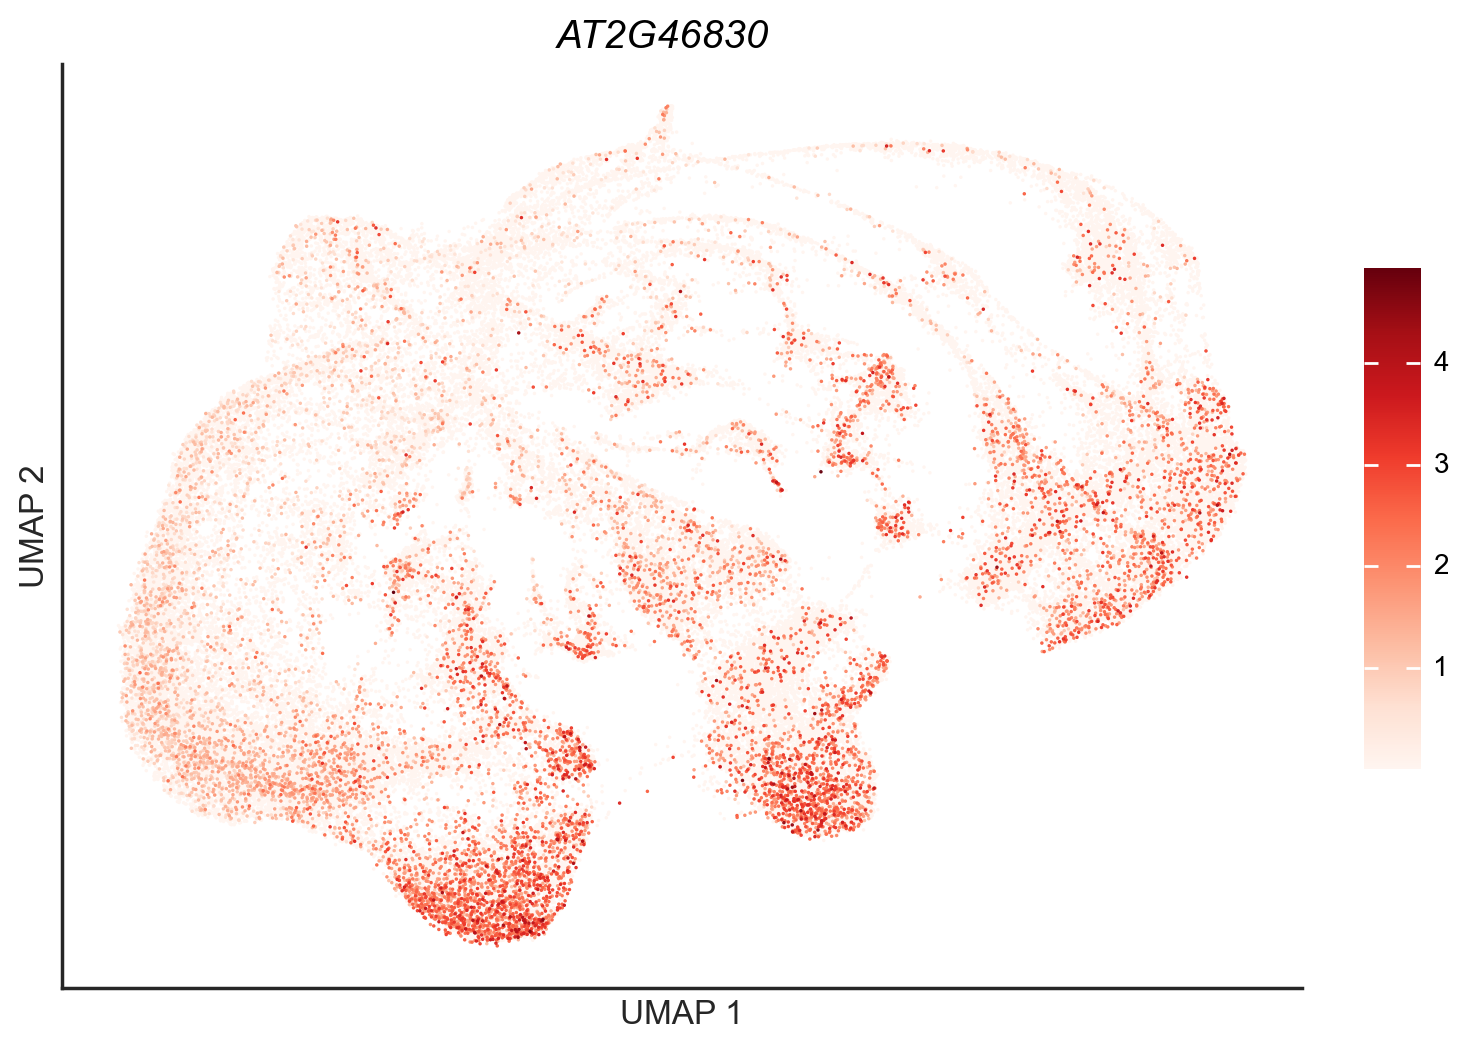

In [ ]:
pad.embedding(color=gene, size=0.5)

2024-10-15 22:20:53.596 | INFO     | jpy_tools.singleCellTools.plotting:_embedding:1719 - Title location: 0.9061111111111113


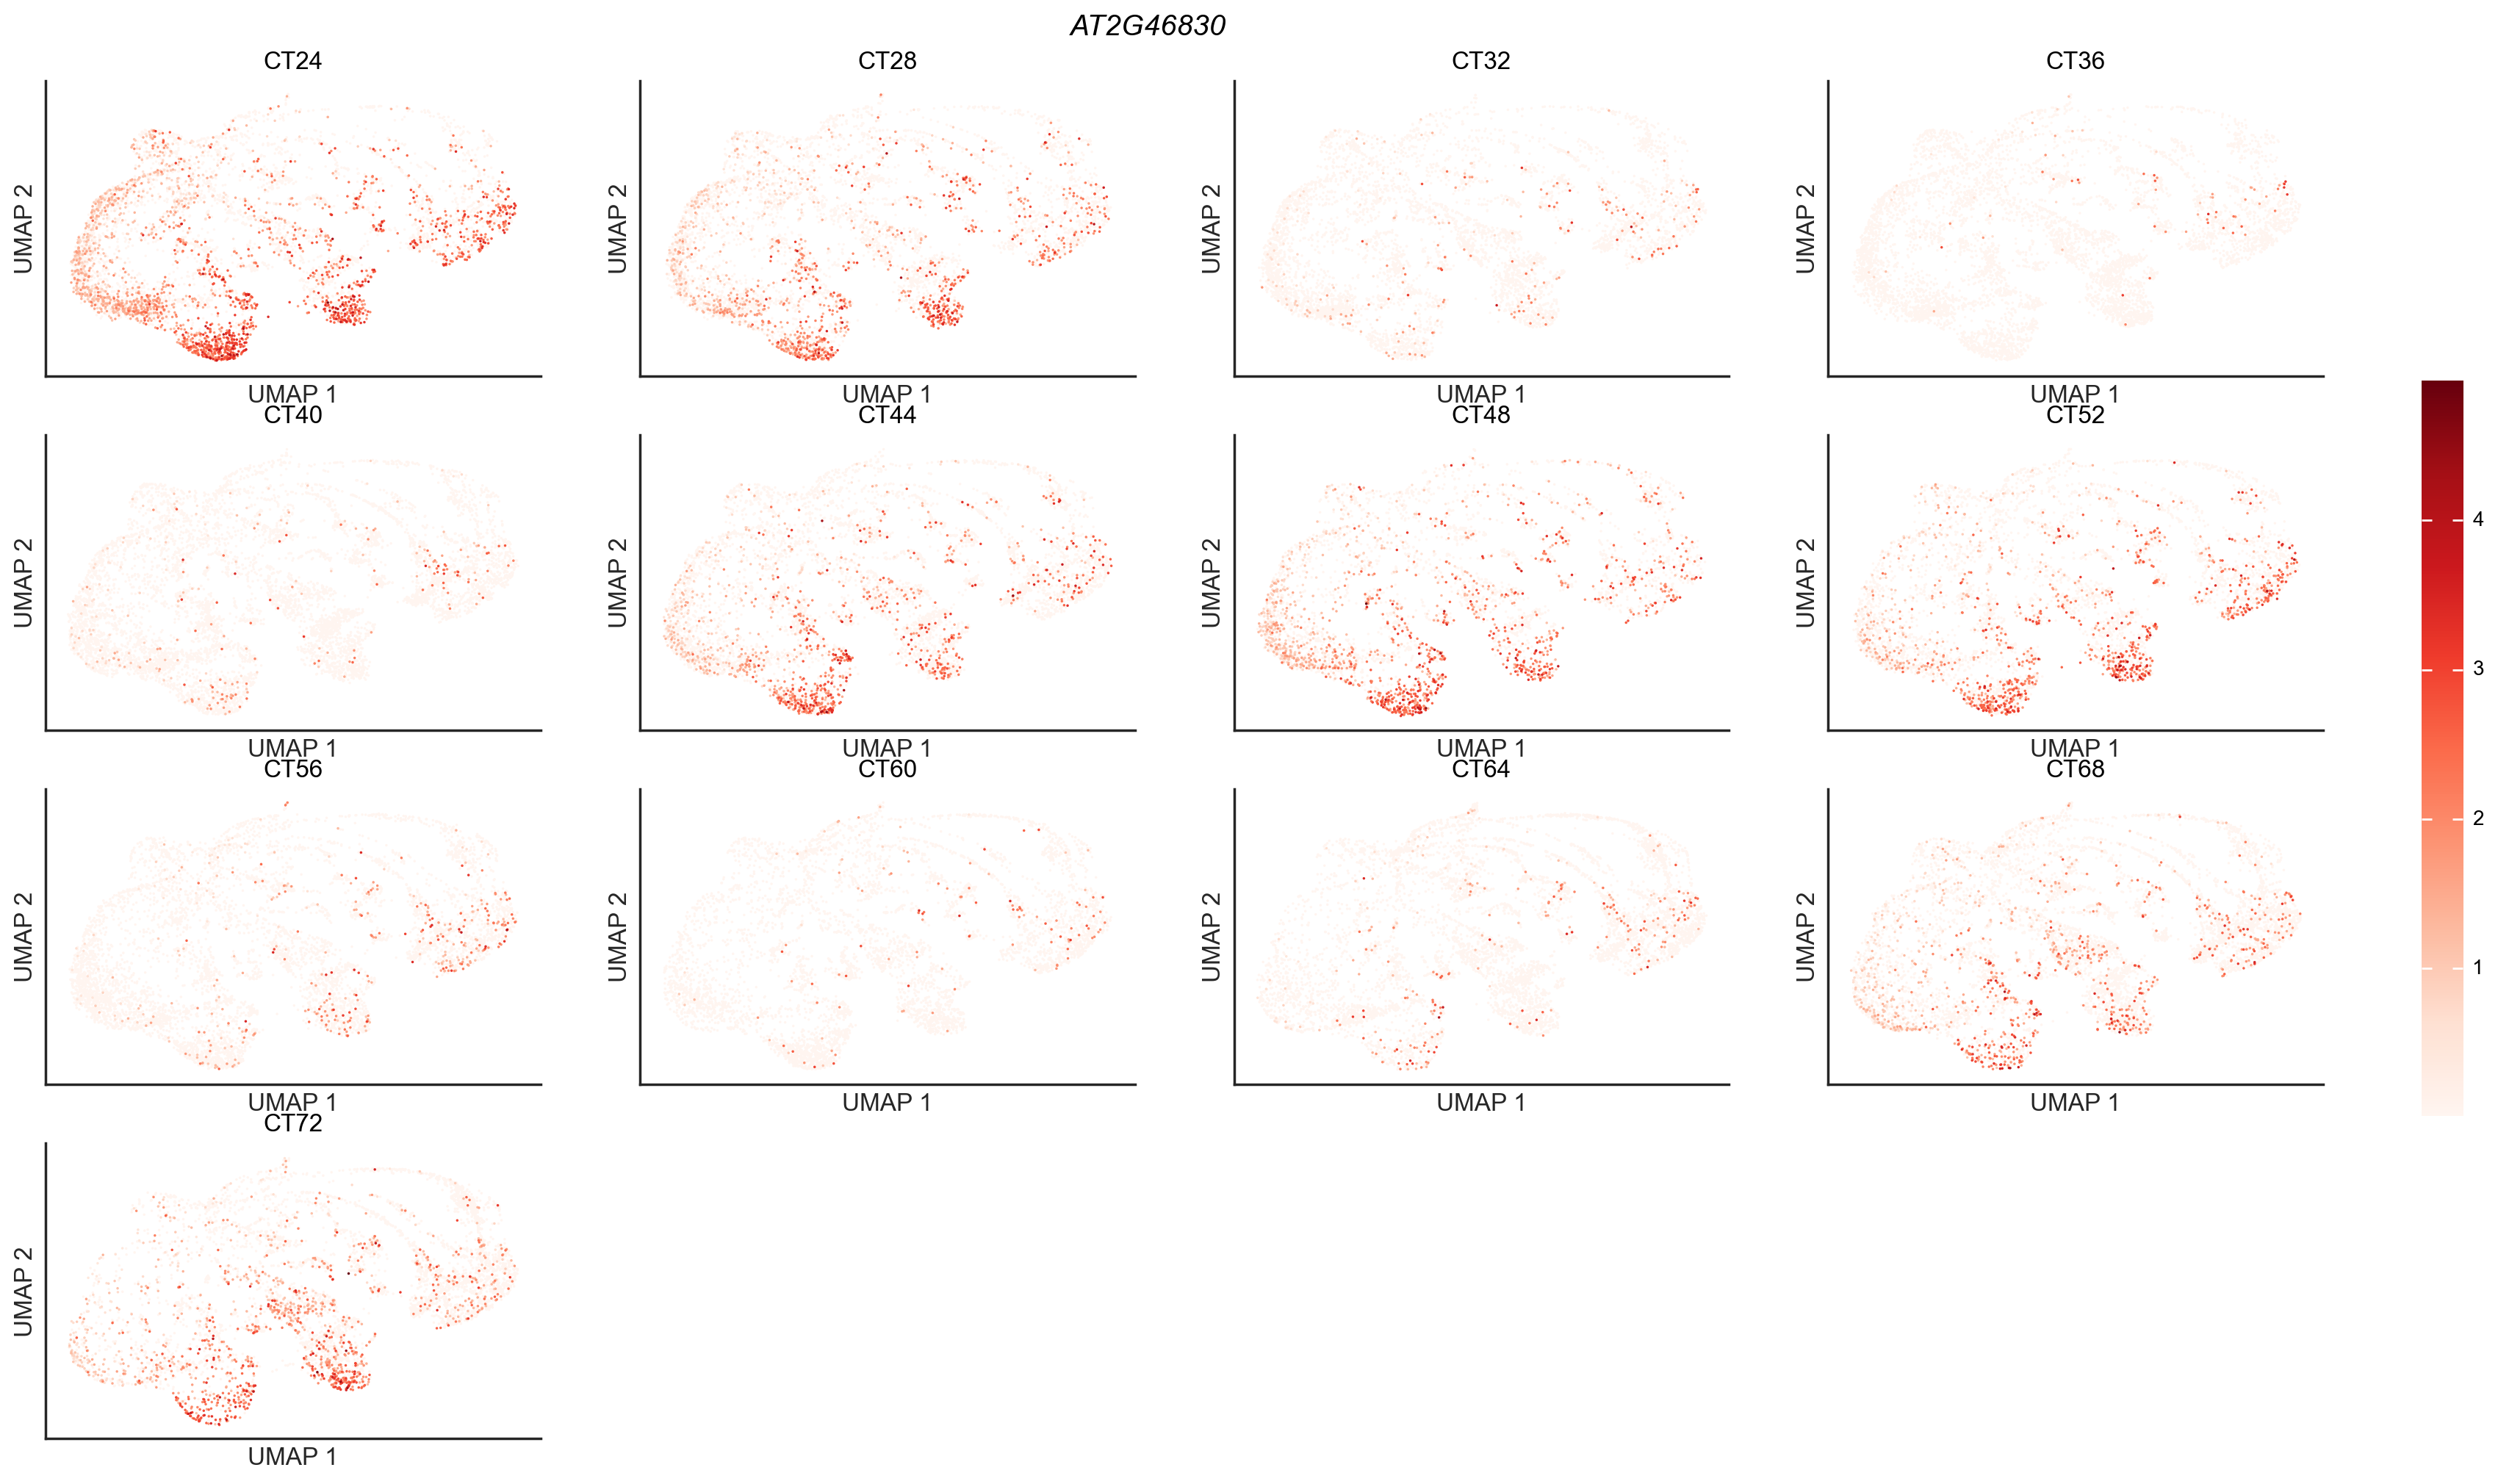

In [ ]:
pad.embedding(color=gene, size=0.5, groupby='CT', wrap=4, figsize=(5*4, 4*3))

In [ ]:
ad_temp = ad_web.copy()
ad_temp.layers = None
ad_temp

AnnData object with n_obs × n_vars = 77142 × 32833
    obs: 'CT', 'Cluster'
    uns: 'pseudobulk_anndata'
    obsm: 'X_umap'

In [ ]:
ad_temp.write_h5ad("/datapool/data/Users/zhijian/ipf/circadian_data/web/48h/cell.h5ad")

## UMAP

In [ ]:
ad_web = sc.read_h5ad('/datapool/data/Users/zhijian/ipf/circadian_data/web/48h/cell.h5ad', 'r')

In [ ]:
ad_web = ad_web[:, gene]

In [ ]:
ad_web.layers['raw'] = ad_web.X.copy()

In [ ]:
pad = singleCellTools.PlotAnndata(ad_web, 'raw')

2024-10-15 19:25:39.742 | INFO     | jpy_tools.singleCellTools.plotting:_embedding:1719 - Title location: 0.8938888888888888


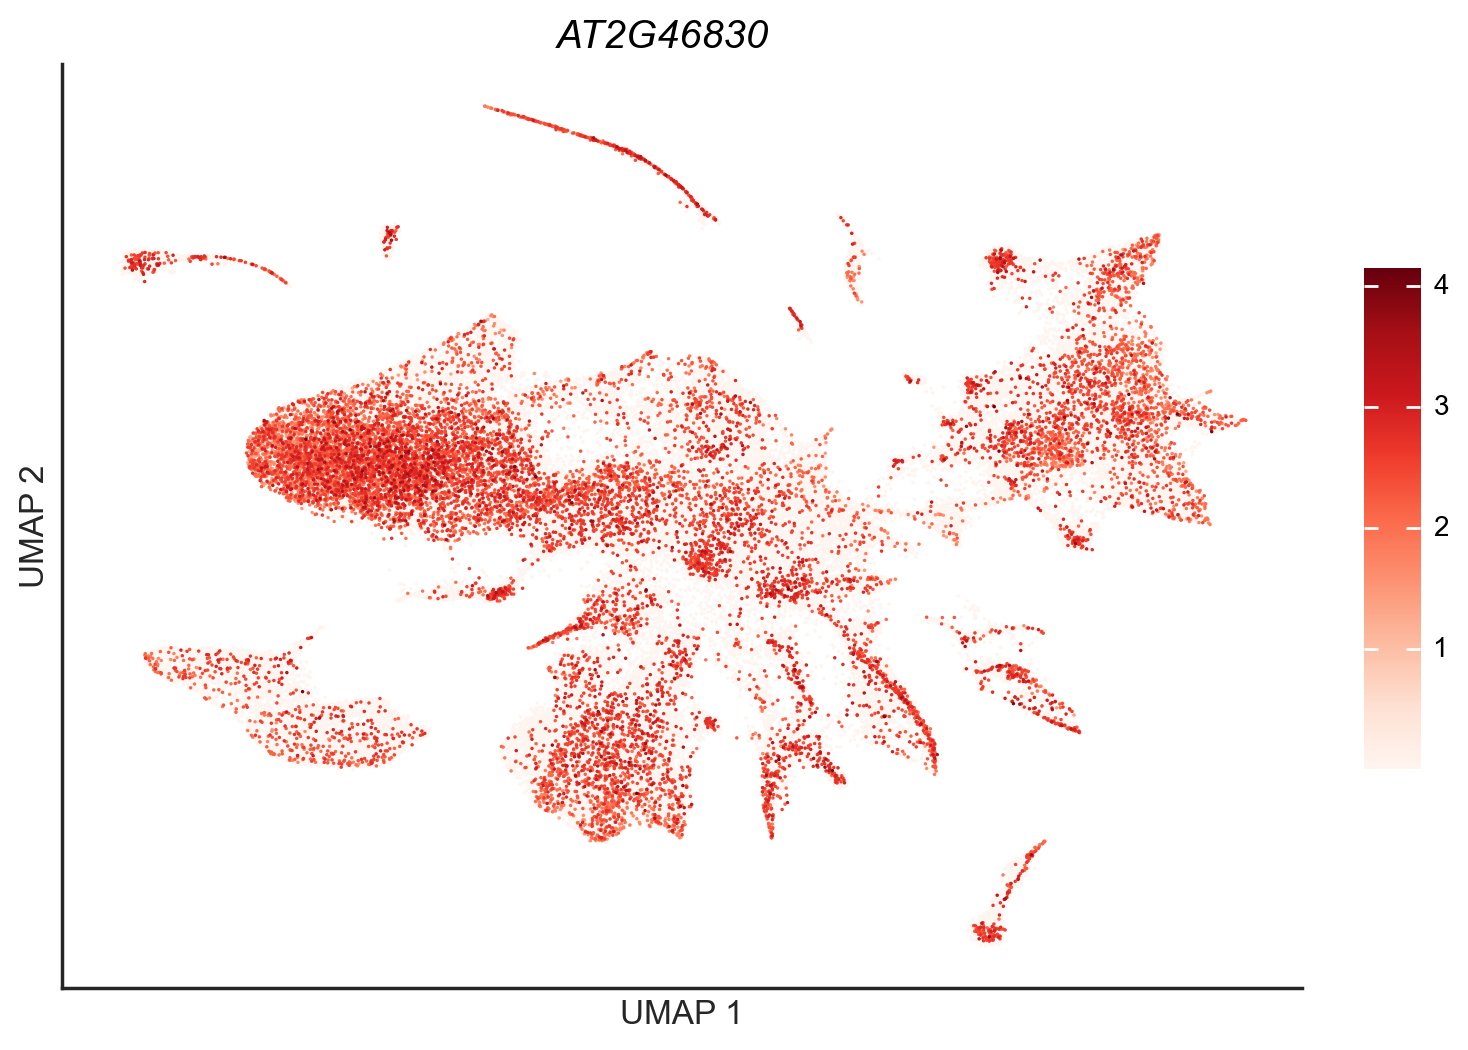

In [ ]:
pad.embedding(color=gene, size=0.5)

2024-10-15 19:25:44.351 | INFO     | jpy_tools.singleCellTools.plotting:_embedding:1719 - Title location: 0.9061111111111113


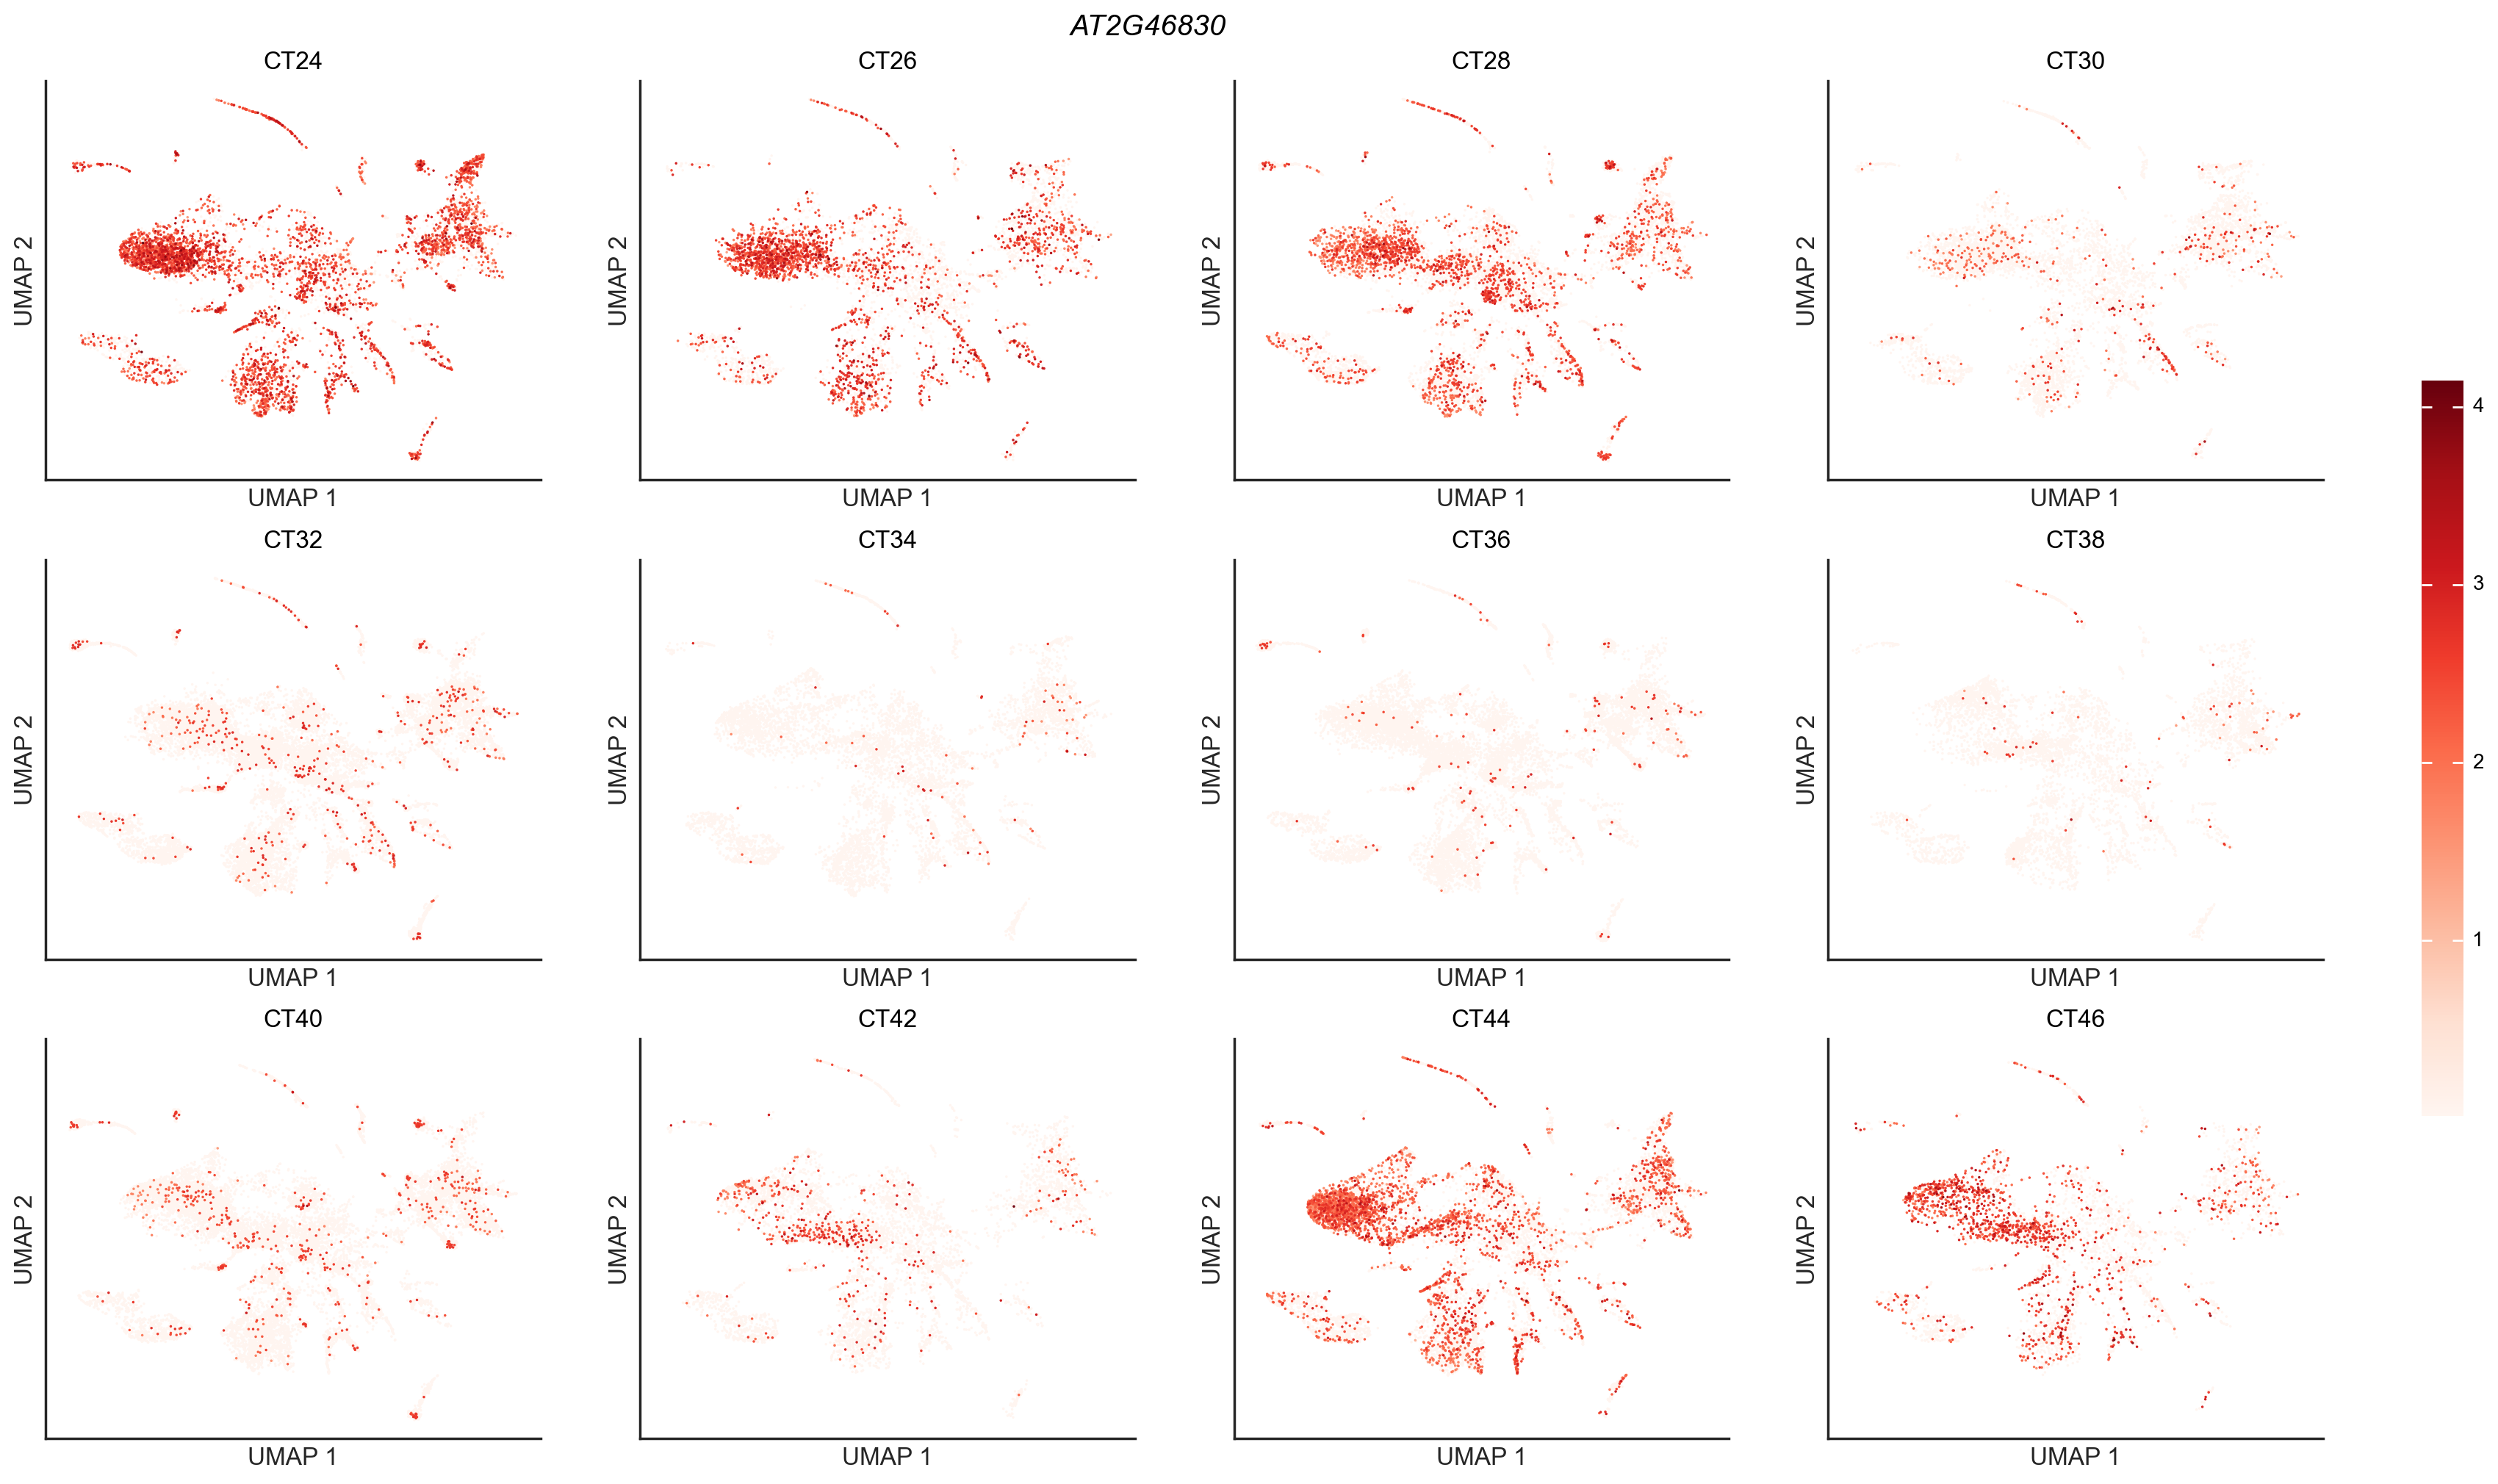

In [ ]:
pad.embedding(color=gene, size=0.5, groupby='CT', wrap=4, figsize=(5*4, 4*3))

## lineplot Cluster

In [ ]:
ead_web = singleCellTools.EnhancedAnndata(ad_web, 'raw')

2024-10-15 22:21:42.100 | WARNING  | jpy_tools.singleCellTools:rawLayer:463 - rawLayer will be overwritten by raw and all the related objects will be re-initialized


In [ ]:
ad_pb = ead_web.pl.getPb(['CT', 'Cluster'], force=True)

2024-10-15 22:22:15 - INFO - Global seed set to 0
2024-10-15 22:22:33.134 | WARNING  | jpy_tools.singleCellTools.basic:testAllCountIsInt:318 - Make sure that adata.layer contains unnormalized count data	Layer:raw


In [ ]:
ad_temp = ad_pb.copy()
ad_temp.X = ad_temp.layers['normalize_log'].copy()
del(ad_temp.layers)
ad_temp.write_h5ad("/datapool/data/Users/zhijian/ipf/circadian_data/web/48h/ct_cluster_log.h5ad")

ad_temp = ad_pb.copy()
ad_temp.X = ad_temp.layers['normalize'].copy()
del(ad_temp.layers)
ad_temp.write_h5ad("/datapool/data/Users/zhijian/ipf/circadian_data/web/48h/ct_cluster_cpm.h5ad")

In [ ]:
ad_web = sc.read_h5ad('/datapool/data/Users/zhijian/ipf/circadian_data/web/48h/ct_cluster_log.h5ad', 'r')

In [ ]:
df_mtx = ad_web[:, gene].to_df().join(ad_web.obs)

In [ ]:
df_mtx['CT'] = df_mtx['CT'].str[2:].astype(int)

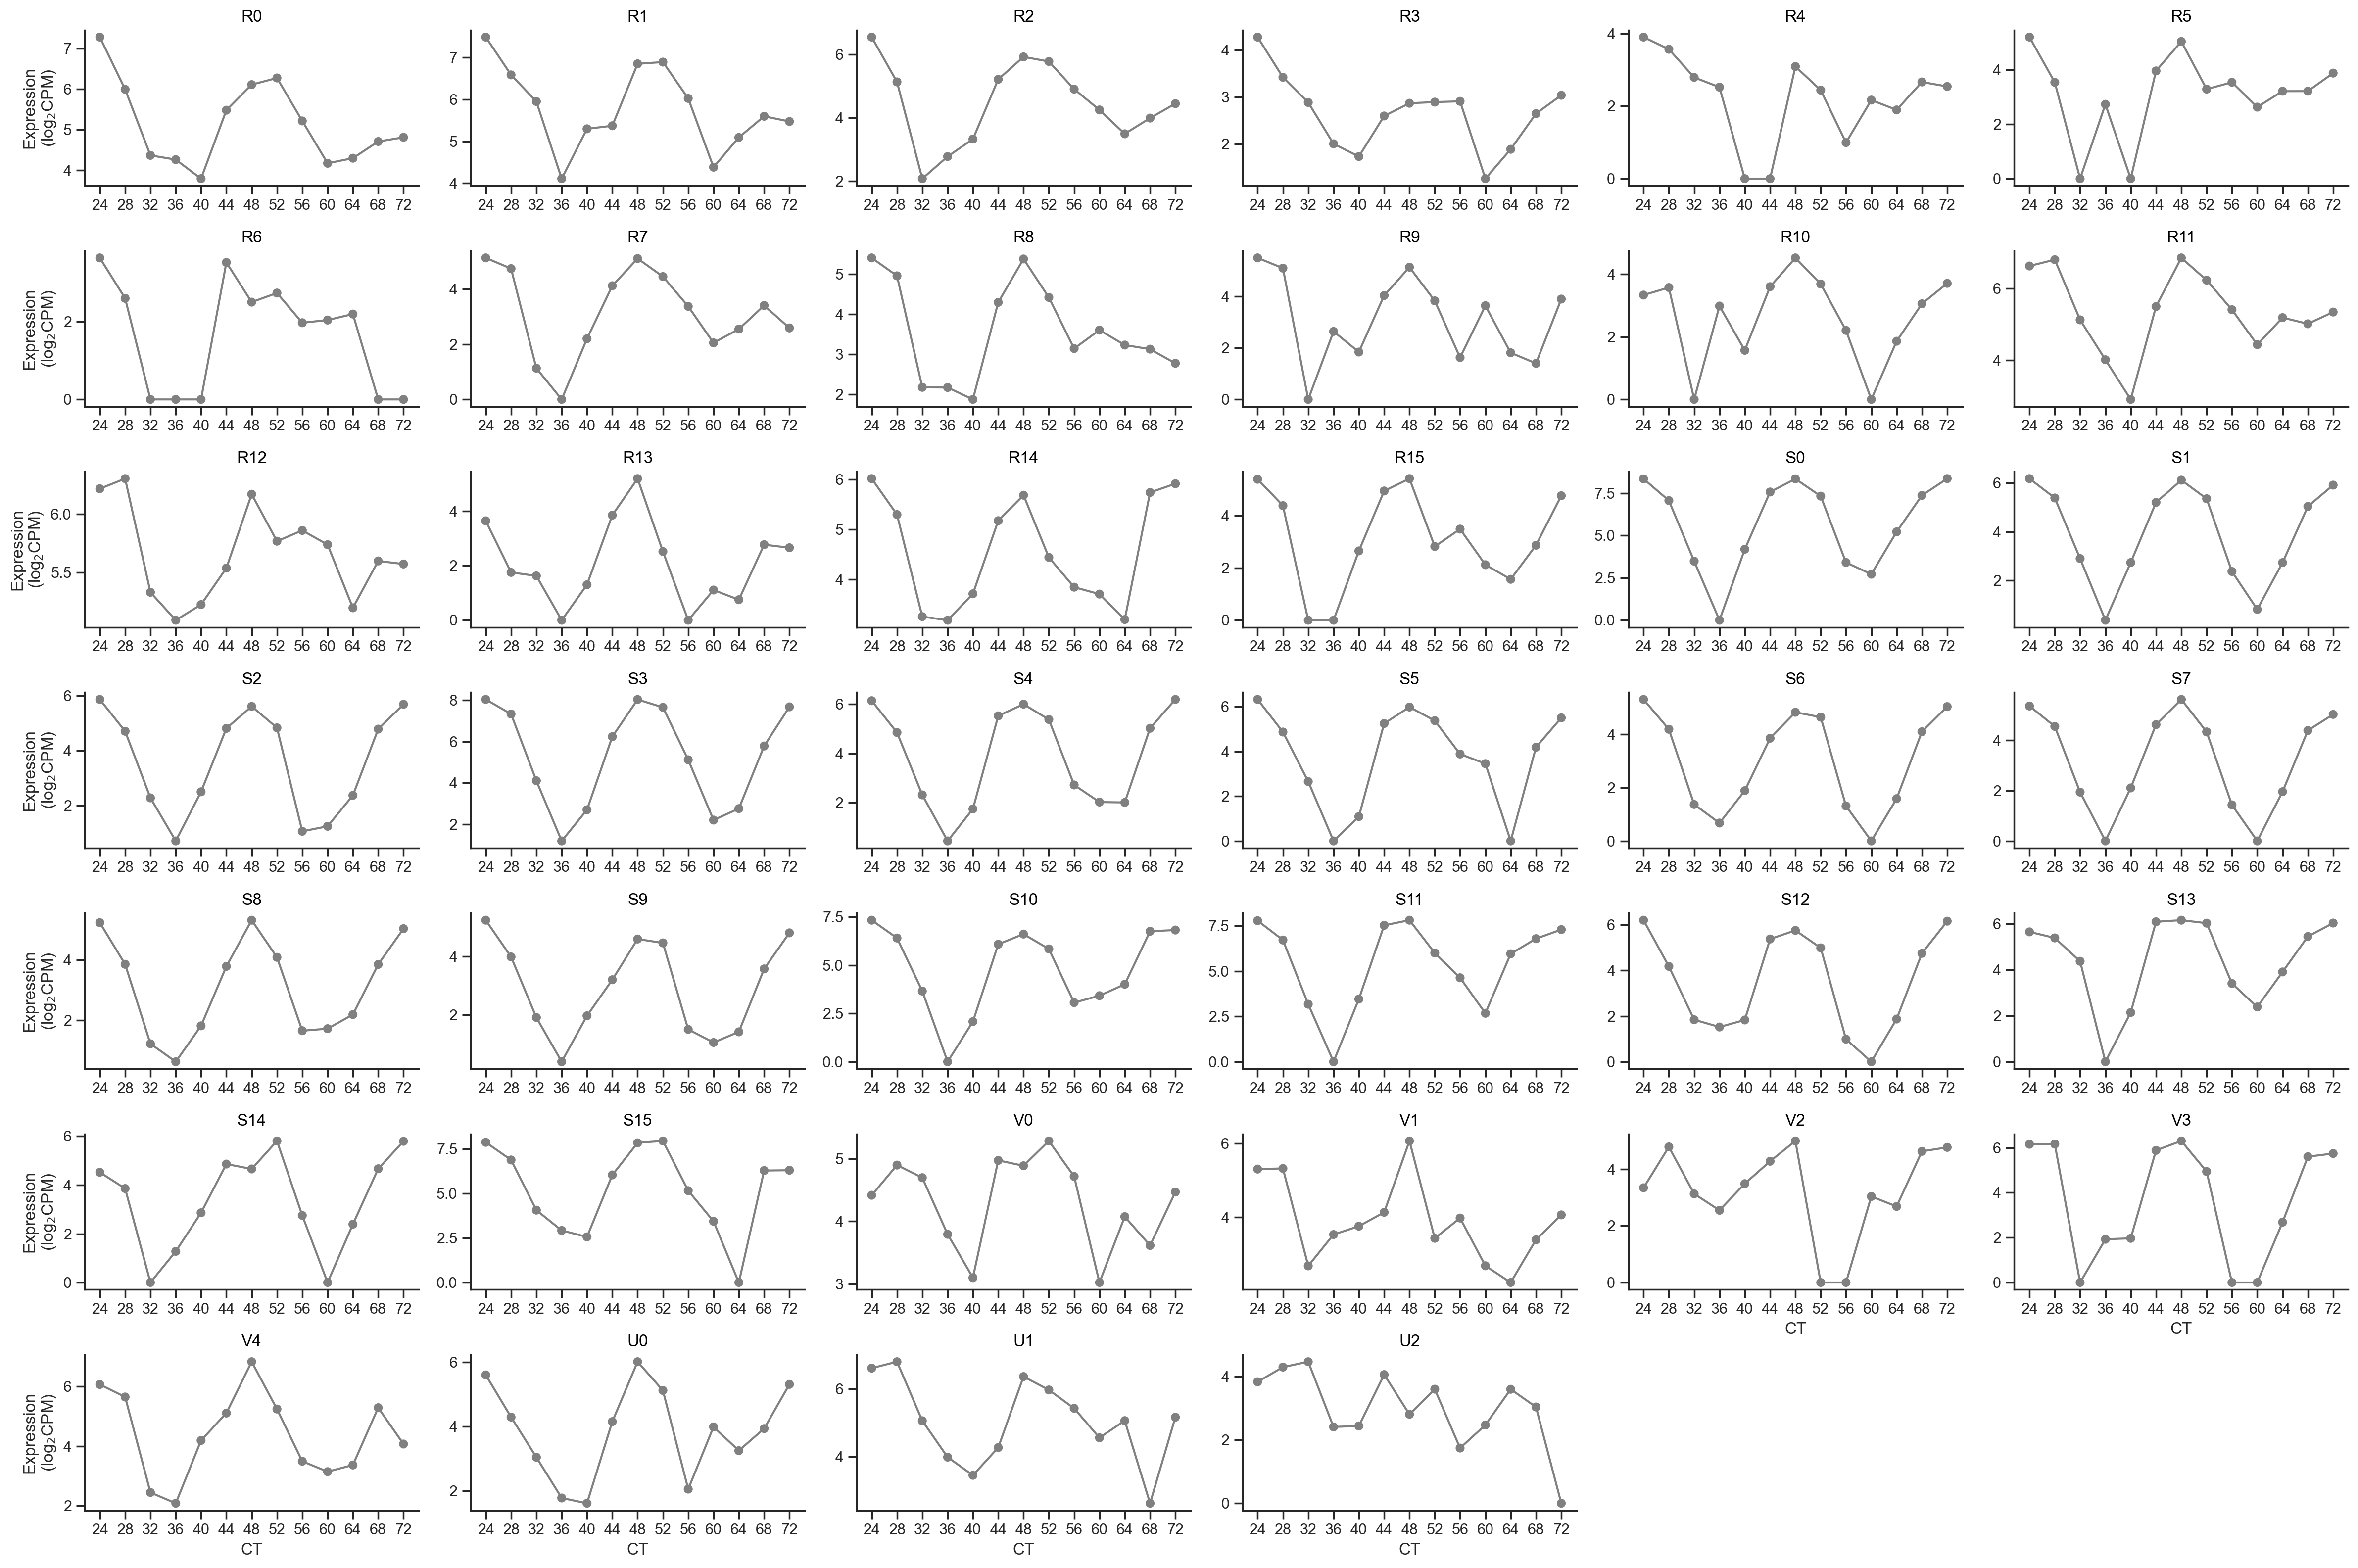

In [ ]:
fig = plt.figure(figsize=(24,16))
(
    so.Plot(df_mtx, x='CT', y=gene)
    .facet(col='Cluster', wrap=6)
    .share(y=sharey, x=False)
    .add(so.Dot())
    .add(so.Line())
    .label(y='Expression\n(log$_{2}$CPM)')
    .scale(x=so.Continuous().tick(every=4))
    .on(fig)
    .plot()
)
plt.close()
fig.tight_layout()
fig

# Barplot

In [ ]:
ad_pb = ead_web.pl.getPb(['Cluster'], force=True)

2024-10-15 22:23:45.222 | WARNING  | jpy_tools.singleCellTools.basic:testAllCountIsInt:318 - Make sure that adata.layer contains unnormalized count data	Layer:raw


In [ ]:
ad_temp = ad_pb.copy()
ad_temp.X = ad_temp.layers['normalize_log'].copy()
del(ad_temp.layers)
ad_temp.write_h5ad("/datapool/data/Users/zhijian/ipf/circadian_data/web/48h/cluster_log.h5ad")

ad_temp = ad_pb.copy()
ad_temp.X = ad_temp.layers['normalize'].copy()
del(ad_temp.layers)
ad_temp.write_h5ad("/datapool/data/Users/zhijian/ipf/circadian_data/web/48h/cluster_cpm.h5ad")

In [ ]:
ad_web = sc.read_h5ad('/datapool/data/Users/zhijian/ipf/circadian_data/web/48h/cluster_log.h5ad', 'r')

In [ ]:
df_mtx = ad_web[:, gene].to_df().join(ad_web.obs)

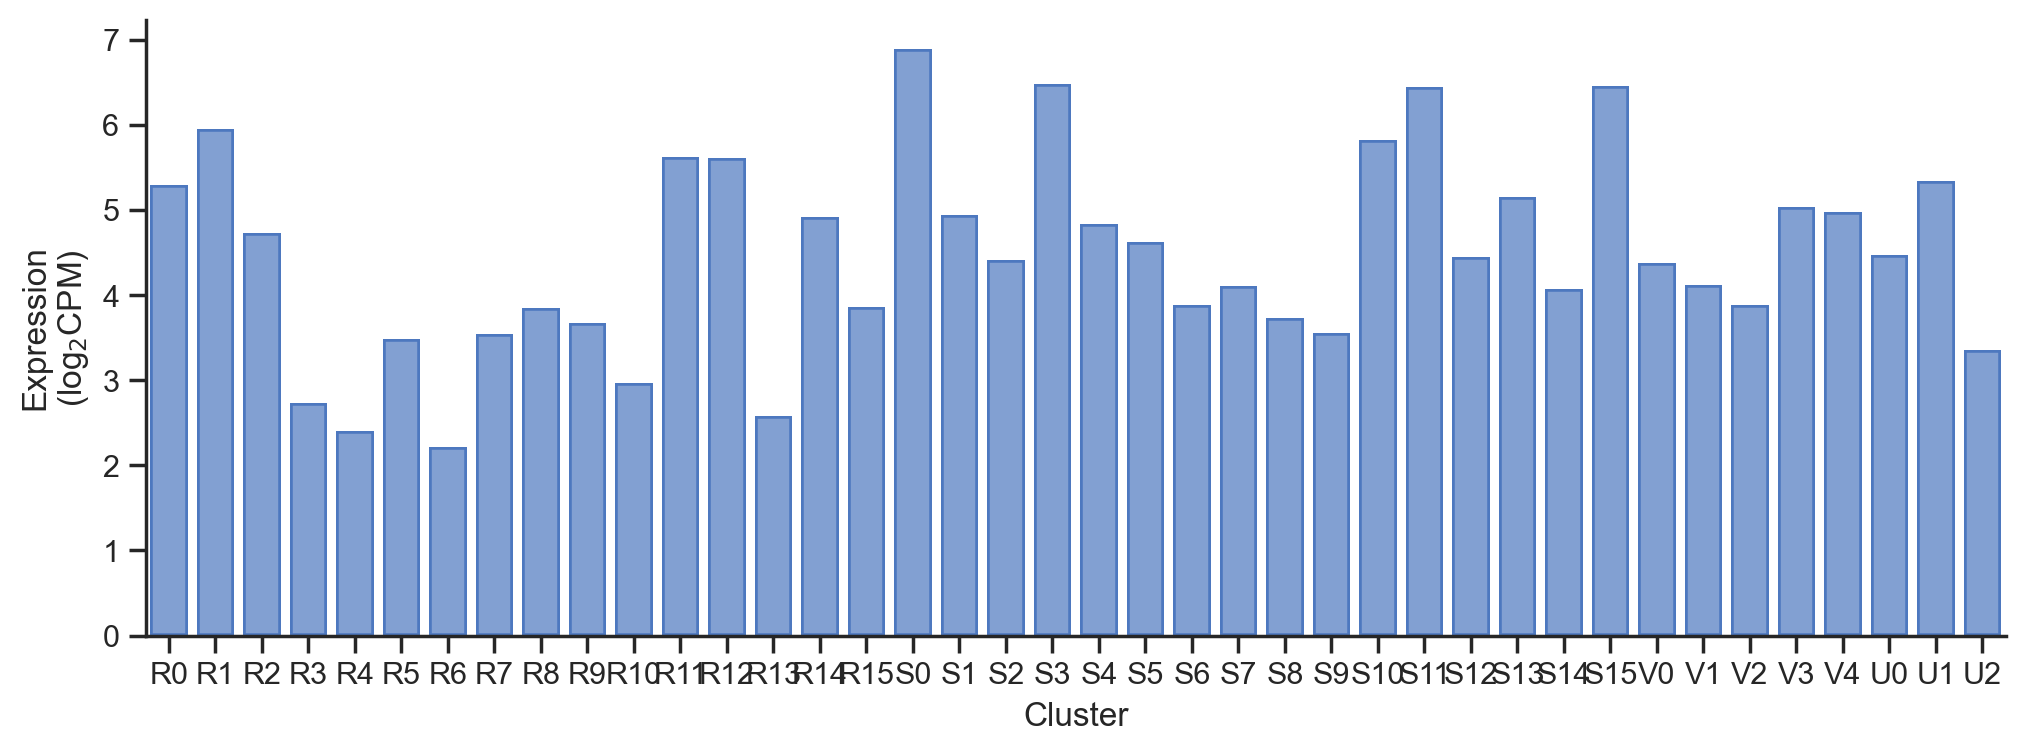

In [ ]:
fig = plt.figure(figsize=(12,4))
(
    so.Plot(df_mtx, x='Cluster', y=gene)
    .add(so.Bar(color='#4d78bf'))
    .label(y='Expression\n(log$_{2}$CPM)')
    .on(fig)
    .plot()
)
plt.close()
fig

# lineplot

In [ ]:
ad_pb = ead_web.pl.getPb(['CT'], force=True)

2024-10-15 22:24:04.474 | WARNING  | jpy_tools.singleCellTools.basic:testAllCountIsInt:318 - Make sure that adata.layer contains unnormalized count data	Layer:raw


In [ ]:
ad_temp = ad_pb.copy()
ad_temp.X = ad_temp.layers['normalize_log'].copy()
del(ad_temp.layers)
ad_temp.write_h5ad("/datapool/data/Users/zhijian/ipf/circadian_data/web/48h/ct_log.h5ad")

ad_temp = ad_pb.copy()
ad_temp.X = ad_temp.layers['normalize'].copy()
del(ad_temp.layers)
ad_temp.write_h5ad("/datapool/data/Users/zhijian/ipf/circadian_data/web/48h/ct_cpm.h5ad")

In [ ]:
ad_web = sc.read_h5ad('/datapool/data/Users/zhijian/ipf/circadian_data/web/48h/ct_log.h5ad', 'r')

In [ ]:
df_mtx = ad_web[:, gene].to_df().join(ad_web.obs)
df_mtx['CT'] = df_mtx['CT'].str[2:].astype(int)

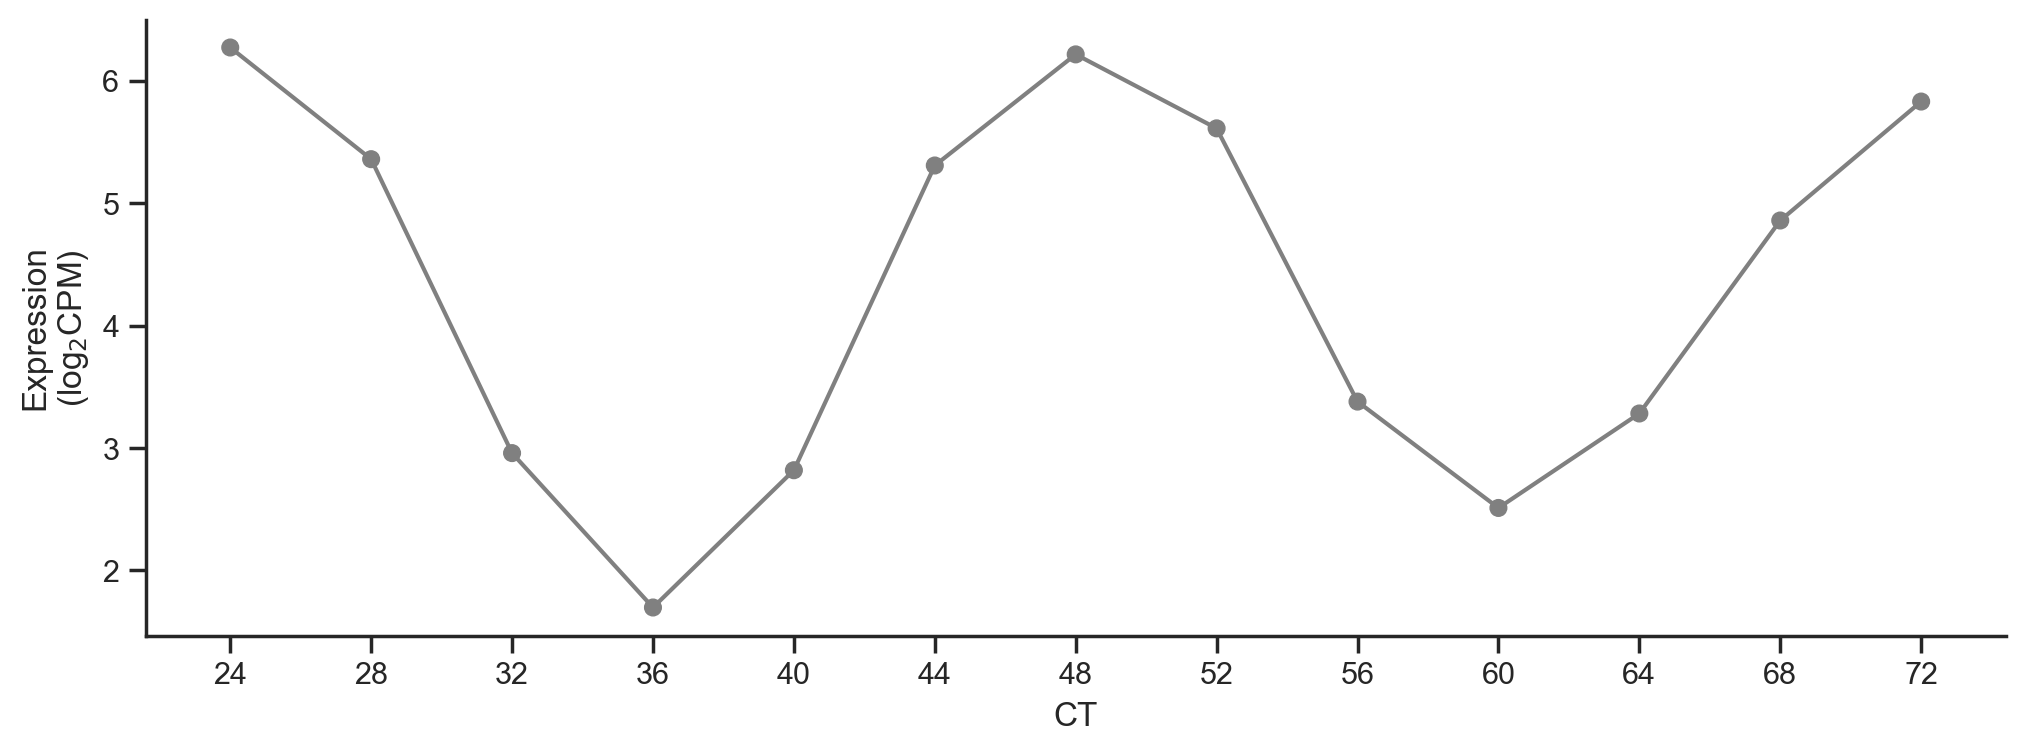

In [ ]:
fig = plt.figure(figsize=(12,4))
(
    so.Plot(df_mtx, x='CT', y=gene)
    .add(so.Dot())
    .add(so.Line())
    .label(y='Expression\n(log$_{2}$CPM)')
    .scale(x=so.Continuous().tick(every=4))
    .on(fig)
    .plot()
)
plt.close()
fig